# Student Health Data Analysis

Authors: Ritika Dawadi, , Sumit Shiwakoti, Prashant Shah, Samman Bhetwal

This notebook performs a comprehensive analysis of student health data to predict health risk levels, and student stress level.

####  Import Statements
This section imports all the libraries and modules required for data analysis, visualization, preprocessing, and machine learning. It includes utilities for suppressing warnings, data manipulation, and statistical analysis using libraries such as pandas, numpy, and math. Visualization tools like matplotlib and seaborn are used for creating plots. Machine learning frameworks such as sklearn provide tools for modeling, evaluation, and preprocessing.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from sklearn.decomposition import PCA

from sklearn.model_selection import (
    train_test_split as tts,
    cross_val_score,
    GridSearchCV,
    learning_curve
)
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import (
    scale,
    StandardScaler,
    LabelEncoder,
    label_binarize
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    VotingClassifier
)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.base import BaseEstimator, ClassifierMixin

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)
from sklearn.metrics import classification_report

from itertools import cycle

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Data Loading and Preprocessing

### Load and Preprocess Data
Loads the dataset and performs initial preprocessing including:
- Removes Student_ID column
- Encodes categorical variables
- Maps categorical values to numerical scale (-1, 0, 1) and Gender (M: 1, F: 0)

In [ ]:
def load_and_preprocess_data(filepath):
    # Read the CSV file
    df = pd.read_csv(filepath)

    # Remove Student_ID
    df = df.drop('Student_ID', axis=1)

    # Create mapping dictionaries for categorical variables
    categorical_mappings = {
        'Physical_Activity': {'Low': -1, 'Moderate': 0, 'High': 1},
        'Sleep_Quality': {'Poor': -1, 'Moderate': 0, 'Good': 1},
        'Mood': {'Stressed': -1, 'Neutral': 0, 'Happy': 1},
        'Health_Risk_Level': {'Low': -1, 'Moderate': 0, 'High': 1},
        'Gender': {'F': 0, 'M': 1}
    }

    # Apply mappings to categorical variables
    for column, mapping in categorical_mappings.items():
        df[column] = df[column].map(mapping)

    return df

In [ ]:
df = load_and_preprocess_data('student_health_data.csv')
df.head(10)

,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,24,1,50.663217,122.173015,84.419860,3.137350,9.028669,1,0,1,34.520973,16.800956,0
1,21,0,57.926042,110.778407,75.696145,3.699078,5.819697,0,1,-1,16.763846,15.791154,0
2,22,1,59.294219,109.375673,83.803814,6.785156,5.892360,-1,0,1,44.203798,25.678437,0
3,24,1,76.826232,125.142227,78.091587,6.408509,6.884001,1,-1,1,21.776645,20.808391,1
4,20,1,68.342769,107.515592,80.674937,7.264719,4.483450,0,-1,1,8.964999,15.194045,0
5,22,1,61.744152,90.000000,84.450865,4.262518,6.825001,0,1,1,44.948229,15.651195,0
6,22,0,93.097228,106.677782,76.499815,8.415979,1.402915,0,0,1,10.269850,23.818096,0
7,24,0,63.361031,115.396783,70.039502,2.836789,1.486429,-1,1,0,39.641788,19.315439,-1
8,19,0,81.671029,142.820977,74.676877,5.221367,5.115074,0,0,0,37.211195,8.854986,0
9,20,1,86.211086,112.635938,91.951392,8.208448,5.946601,0,0,1,33.195541,19.744741,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,20.960000,2.003600,18.000000,19.000000,21.000000,23.000000,24.000000
Gender,1000.0,0.519000,0.499889,0.000000,0.000000,1.000000,1.000000,1.000000
Heart_Rate,1000.0,70.101863,9.544663,50.000000,63.347970,70.330916,76.425149,99.650104
Blood_Pressure_Systolic,1000.0,119.835380,14.604307,90.000000,109.386868,120.051654,130.397799,165.929204
Blood_Pressure_Diastolic,1000.0,79.854756,9.641699,60.000000,73.115420,79.651738,86.535640,107.659796
Stress_Level_Biosensor,1000.0,5.483909,2.596108,1.008491,3.270567,5.368891,7.674233,9.994153
Stress_Level_Self_Report,1000.0,5.361601,2.550382,1.002186,3.172409,5.234889,7.471178,9.964115
Physical_Activity,1000.0,-0.095000,0.707443,-1.000000,-1.000000,0.000000,0.000000,1.000000
Sleep_Quality,1000.0,0.263000,0.783866,-1.000000,0.000000,0.000000,1.000000,1.000000
Mood,1000.0,0.213000,0.734963,-1.000000,0.000000,0.000000,1.000000,1.000000


### Student Health Risk Dataset

Variables:

1. Age: Age in years

2. Gender: 0 for female, 1 for male

3. Heart_Rate: Resting heart rate in BPM

4. Blood_Pressure_Systolic: Systolic blood pressure in mmHg

5. Blood_Pressure_Diastolic: Diastolic blood pressure in mmHg

6. Stress_Level_Biosensor: Stress level measured by a biosensor

7. Stress_Level_Self_Report: Self-reported stress level

8. Physical_Activity: -1 for low, 0 for moderate, 1 for high

9. Sleep_Quality: -1 for poor, 0 for moderate, 1 for good

10. Mood: -1 for stressed, 0 for neutral, 1 for happy

11. Study_Hours: Number of study hours per week

12. Project_Hours: Number of project hours per week

13. Health_Risk_Level: -1 for low, 0 for moderate, 1 for high

In [ ]:
df.shape

(1000, 13)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Heart_Rate,0
Blood_Pressure_Systolic,0
Blood_Pressure_Diastolic,0
Stress_Level_Biosensor,0
Stress_Level_Self_Report,0
Physical_Activity,0
Sleep_Quality,0
Mood,0


#### Basic Statistics

Count: Data for 1000 students.

Age: Mean age is approximately 21 years, with a range from 18 to 24.

Heart Rate: Average heart rate is 70.1 BPM, with a range from 50 to 99.65.

Blood Pressure: Mean systolic BP is 119.83 mmHg, diastolic 79.85 mmHg.

Stress Level: Average biosensor-measured stress is 5.48, self-reported stress is 5.36.

Study/Project Hours: Mean study hours 30.23 per week, project hours 14.89.

Data Quality

Missing Values: No missing values in the dataset.

Data Types: Age, heart rate, blood pressure, stress levels, study/project hours are numerical. Gender, physical activity, sleep quality, mood, health risk level are categorical, encoded as numbers.


## Exploratory Data Analysis

### Basic Statistics Display
Displays fundamental statistical information about the dataset including:
- Basic dataset information
- Summary statistics
- Missing value check

### Correlation Analysis
Creates a correlation matrix heatmap to visualize relationships between variables

In [ ]:
def create_correlation_matrix(df):
    # Create correlation matrix
    correlation_matrix = df.corr()

    # Create heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Student Health Metrics')
    plt.tight_layout()
    plt.show()

    return correlation_matrix

###  Data Visualization
The prepare_data_for_modeling function:

Separates the dataset into features (X) and the target variable (y).
Splits the data into training and testing sets.
Scales features to standardize their values for machine learning models. The processed data is returned for use in training and evaluation.

### Relationship Analysis
Analyzes relationships between stress-related variables and gender-based differences

In [ ]:
def plot_stress_relationships(df):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.scatterplot(data=df, x='Stress_Level_Biosensor', y='Stress_Level_Self_Report')
    plt.title('Biosensor vs Self-Reported Stress')

    plt.subplot(1, 3, 2)
    sns.boxplot(data=df, x='Health_Risk_Level', y='Stress_Level_Biosensor')
    plt.title('Stress Levels by Health Risk')

    plt.subplot(1, 3, 3)
    sns.boxplot(data=df, x='Mood', y='Stress_Level_Biosensor')
    plt.title('Stress Levels by Mood')

    plt.tight_layout()
    plt.show()

def plot_gender_analysis(df):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.boxplot(data=df, x='Gender', y='Heart_Rate')
    plt.title('Heart Rate by Gender')

    plt.subplot(1, 3, 2)
    sns.boxplot(data=df, x='Gender', y='Stress_Level_Biosensor')
    plt.title('Stress Level by Gender')

    plt.tight_layout()
    plt.show()

## Analysis Execution
Run all analyses in sequence

In [ ]:
df = load_and_preprocess_data('student_health_data.csv')
data = pd.read_csv('student_health_data.csv')

### Research Question 1: Which Features are strongly correlated with Health Risk Level?

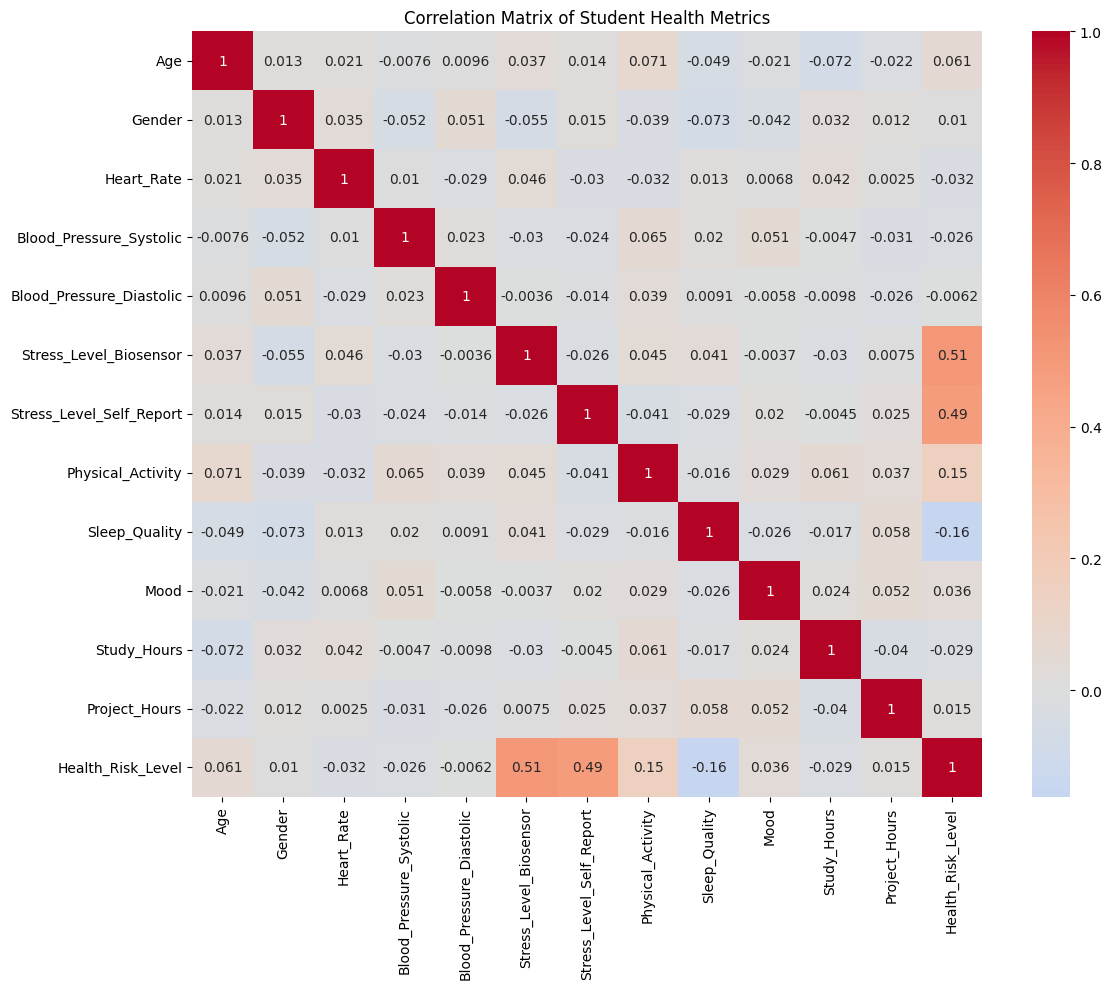

In [ ]:
correlation_matrix = create_correlation_matrix(df)

In [ ]:
correlation_matrix['Health_Risk_Level'].sort_values(ascending=False)

,Health_Risk_Level
Health_Risk_Level,1.000000
Stress_Level_Biosensor,0.508138
Stress_Level_Self_Report,0.486826
Physical_Activity,0.153886
Age,0.061216
Mood,0.035983
Project_Hours,0.014724
Gender,0.010485
Blood_Pressure_Diastolic,-0.006184
Blood_Pressure_Systolic,-0.025919


On the left, we can see that Stress Level Biosensor and Self-Reported Stress are the two features most strongly correlated with health risk. This makes sense – students who report feeling more stressed often experience poorer health outcomes.
Features like Physical Activity, Sleep Quality, and even Mood also show some correlation, although weaker.
Interestingly, factors like Age and Study Hours have very low correlation with health risk.

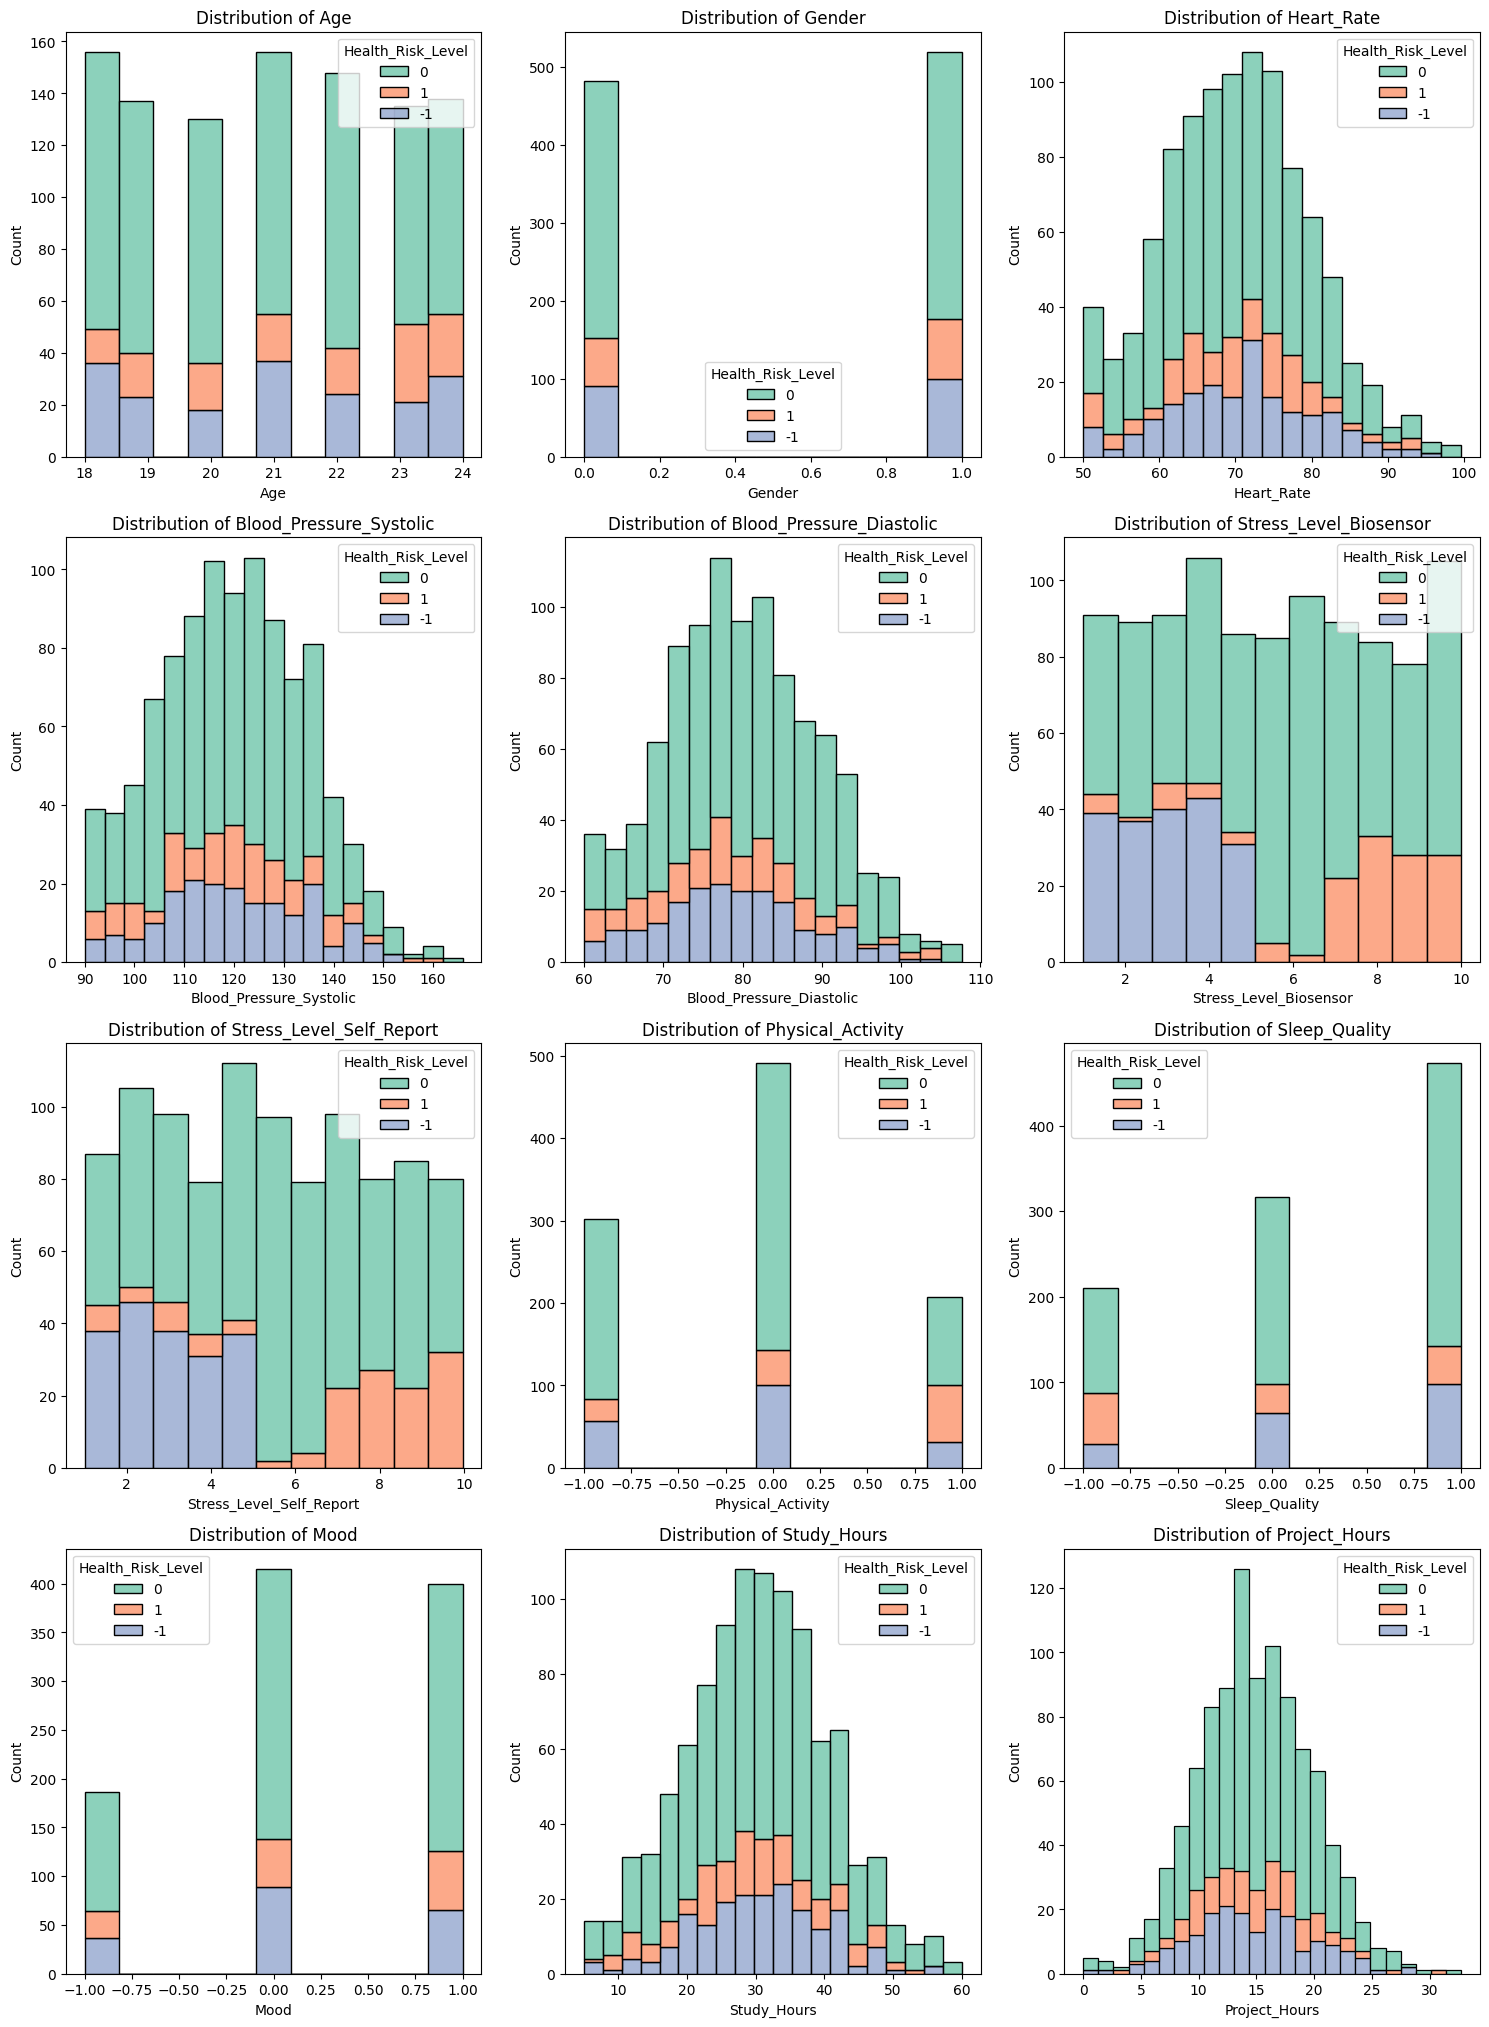

In [ ]:
df["Health_Risk_Level"] = df["Health_Risk_Level"].astype(str)

unique_levels = df["Health_Risk_Level"].unique()

custom_colors = sns.color_palette("Set2", len(unique_levels))
color_mapping = dict(zip(unique_levels, custom_colors))

num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 3)

fig, ax = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
ax = ax.flatten()

i = 0
for col in df.columns:
    if col != "Health_Risk_Level":
        sns.histplot(
            data=df,
            x=col,
            hue="Health_Risk_Level",
            multiple="stack",
            ax=ax[i],
            palette=color_mapping,
            edgecolor="black"
        )
        ax[i].set_title(f"Distribution of {col}")
        i += 1

for j in range(i, len(ax)):
    ax[j].set_visible(False)

plt.tight_layout()
plt.show()


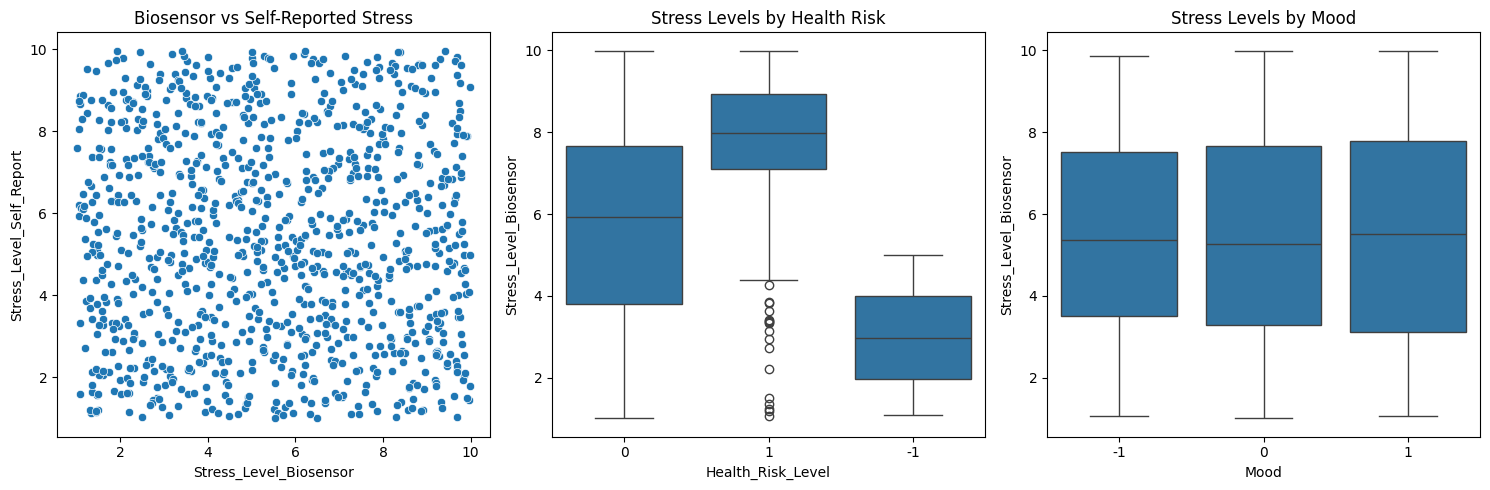

In [ ]:
plot_stress_relationships(df)

### Research Question 2: Is stress level different between male and females?

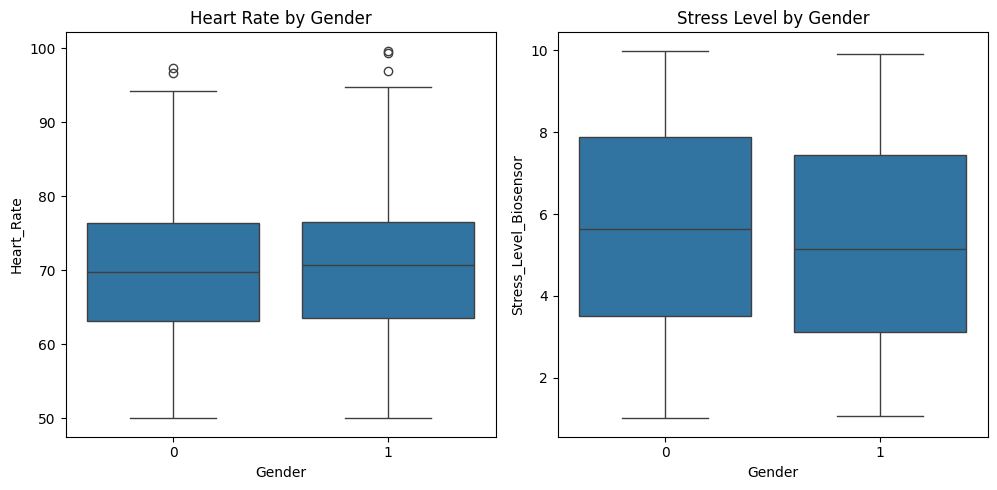

In [ ]:
plot_gender_analysis(df)

As it can be seen above, male and female college students have similar stress levels.

**Examining the Distribution of Data**

We can observe that features like heart rate, blood pressure (systolic and diastolic), study hours, and project hours have a normal distribution while Stress Level (Biosensor and Self Reported) have a uniform distribution.

### Research Question 3: What is the impact of Sleep Quality on Stress Level?

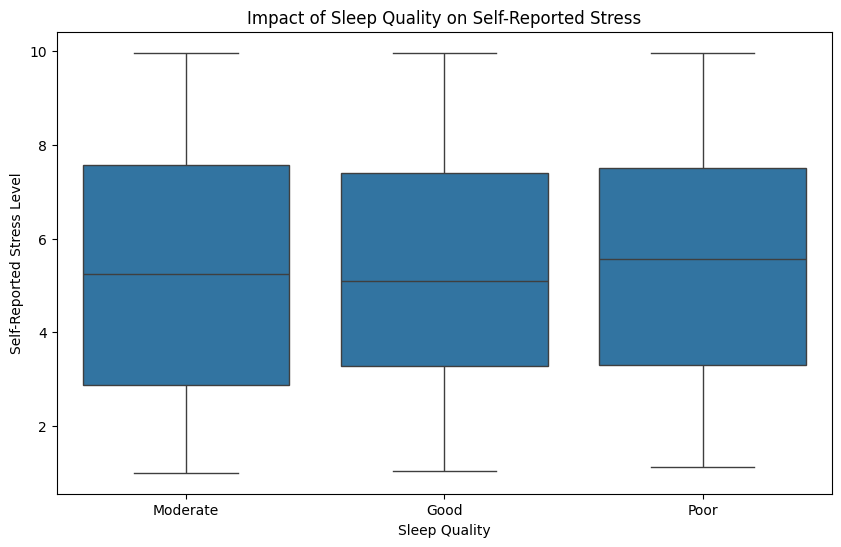

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Sleep_Quality", y="Stress_Level_Self_Report", data=data)
plt.title("Impact of Sleep Quality on Self-Reported Stress")
plt.xlabel("Sleep Quality")
plt.ylabel("Self-Reported Stress Level")
plt.show()

Here we can observe that the box plots for stress levels based on sleep quality are almost identical.
The major points to be observed from the box plots are:
1. People with moderate sleep quality report more diverse stress levels.
2. People with poor sleep quality have a higher median self reported stress level.
3. People with Good sleep quality have the lowest median and range of self-reported stress level.

### Research question 4: Impact of Physical Activity in stress level?

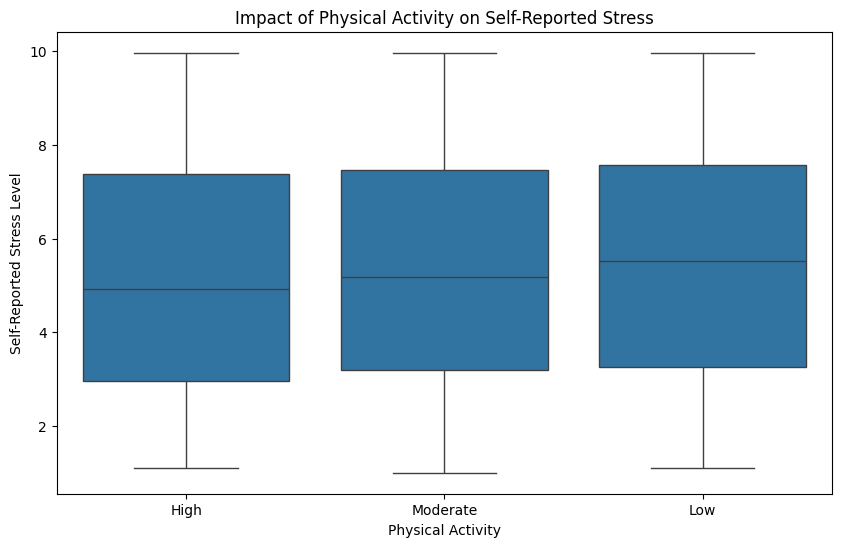

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Physical_Activity", y="Stress_Level_Self_Report", data=data)
plt.title("Impact of Physical Activity on Self-Reported Stress")
plt.xlabel("Physical Activity")
plt.ylabel("Self-Reported Stress Level")
plt.show()

High physical activity has a slightly lower median stress level, with more variability in stress.

Moderate physical activity shows consistent stress levels, with a median slightly lower than low activity.

Low physical activity is associated with higher median stress levels, but with a wider spread of values.

No significant outliers are present in any group, suggesting consistent data within each category.

## Research question 5: What are the major criteria for at-risk students:
 1. High Blood Pressure (Systolic > Mean)
 2. High Self-Reported Stress (Stress_Level_Self_Report > Mean)
 3. Poor Sleep Quality
 4. Low Physical Activity

Mapping the Qualitative Data

In [ ]:
pd.set_option('future.no_silent_downcasting', True)
data['Physical_Activity'] = data['Physical_Activity'].replace({'Low': -1, 'Moderate': 0, 'High':1})
data['Sleep_Quality'] = data['Sleep_Quality'].replace({'Moderate': 0, 'Good': 1, 'Poor': -1})
data['Mood'] = data['Mood'].replace({'Stressed': -1, 'Neutral': 0, 'Happy': 1})
data['Gender'] = data['Gender'].replace({'M': 0, 'F': 1})
data['Health_Risk_Level'] = data['Health_Risk_Level'].replace({'Low': -1, 'Moderate': 0, 'High':1})
data = data.convert_dtypes()

## Data Preparation
Prepares the data for modeling by separating features and target, splitting the data, and scaling features

In [ ]:
def prepare_data_for_modeling(df):
    """
    Prepare data for modeling with proper type handling
    """
    df = df.copy()

    df['Health_Risk_Level'] = df['Health_Risk_Level'].astype(float)

    y = df['Health_Risk_Level']

    X = df.drop('Health_Risk_Level', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    print("\nFinal shapes:")
    print(f"X_train_scaled shape: {X_train_scaled.shape}")
    print(f"X_test_scaled shape: {X_test_scaled.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_data_for_modeling(df)

# Display the shapes of our training and testing sets
print("\nDataset shapes after preparation:")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nSample of scaled features:")
print(X_train_scaled.head())


Final shapes:
X_train_scaled shape: (800, 12)
X_test_scaled shape: (200, 12)
y_train shape: (800,)
y_test shape: (200,)

Dataset shapes after preparation:
X_train shape: (800, 12)
X_test shape: (200, 12)
y_train shape: (800,)
y_test shape: (200,)

Sample of scaled features:
          Age    Gender  Heart_Rate  Blood_Pressure_Systolic  \
825  0.023508  0.965592    0.512415                 1.492647   
560  0.518415  0.965592   -0.667224                 0.989708   
731  1.508230 -1.035635   -0.596844                 0.875725   
471  0.518415  0.965592    1.229148                 0.839659   
506  0.518415 -1.035635   -0.586570                -0.237303   

     Blood_Pressure_Diastolic  Stress_Level_Biosensor  \
825                 -0.734412                1.705728   
560                 -0.036694               -1.537562   
731                 -0.442140               -1.623219   
471                 -1.783047                1.623436   
506                  1.482114               -0.923467 

In [ ]:
X_regression = data.drop(columns = 'Stress_Level_Self_Report')
Y_regression = data['Stress_Level_Self_Report']

In [ ]:
X_regression_scaled = scaler.fit_transform(X_regression)
X_regression_scaled = pd.DataFrame(X_regression_scaled, columns=X_regression.columns)
X_regression_scaled.head()

ValueError: could not convert string to float: 'M'

**Examining the distribution of the target variable**

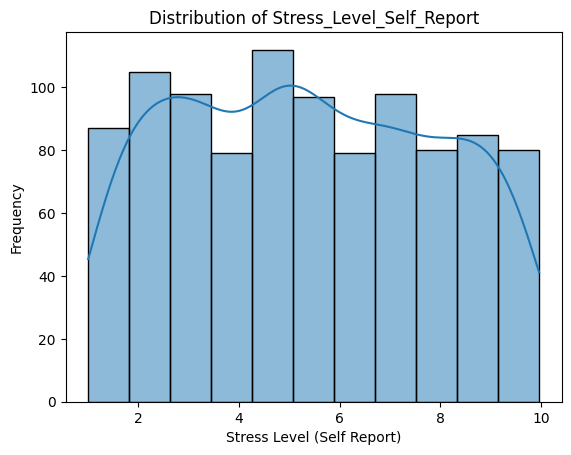

In [ ]:
sns.histplot(Y_regression, kde=True)
plt.title("Distribution of Stress_Level_Self_Report")
plt.xlabel("Stress Level (Self Report)")
plt.ylabel("Frequency")
plt.show()

We can observe that the target variable has an almost uniform distribution

**Split the data for *regression* into a training set, a validation set, and a testing set**

In [ ]:
X_reg_train,X_temp,Y_reg_train,Y_temp = tts(X_regression_scaled, Y_regression, test_size = 0.2, random_state = 42)
X_reg_valid, X_reg_test, Y_reg_valid, Y_reg_test = tts(X_temp, Y_temp, test_size = 1/2, random_state = 42)

NameError: name 'X_regression_scaled' is not defined

**Feature Importance Using Random Forest Algorithm**

In [ ]:
RFR = RandomForestRegressor(n_estimators = 100, random_state = 42)
RFR.fit(X_reg_train, Y_reg_train)
feature_importance = RFR.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_regression.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)
plt.figure(figsize = (12,10))
sns.barplot(x = "Importance", y = "Feature", data = importance_df)
plt.title("Features Importances")
plt.show()

NameError: name 'X_reg_train' is not defined

### Research question : Which machine learning model can predict health risk most accurately?

# Machine Learning Models for Classification
***Target Variable: Health Risk Level***

### 1. K Nearest Neighbors

The KNN algorithm is trained with different values of k (k=1, k =3, k=5). The model's performance is evaluated using metrics like accuracy, precision, recall, and F1 score.

In [ ]:
def train_knn_classifier(X_train, y_train, k):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    print(f"\nKNN Classifier trained with k={k}")
    return knn


In [ ]:
def evaluate_knn_classifier(model, X_test, y_test, X_train=None, y_train=None):

    y_pred = model.predict(X_test)

    print("\nModel Evaluation:")
    print("-----------------")

    if X_train is not None and y_train is not None:
        y_train_pred = model.predict(X_train)
        print("\nTraining Set Metrics:")
        print("---------------------")
        print("\nClassification Report:")
        print(classification_report(y_train, y_train_pred))

        plt.figure(figsize=(8, 6))
        ConfusionMatrixDisplay.from_predictions(
            y_train,
            y_train_pred,
            cmap='Blues'
        )
        plt.title('Confusion Matrix - Training Set')
        plt.show()

    print("\nTest Set Metrics:")
    print("------------------")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        cmap='Blues'
    )
    plt.title('Confusion Matrix - Test Set')
    plt.show()

    return y_pred



Training and evaluating KNN Classifier with k=1...

KNN Classifier trained with k=1

Model Evaluation:
-----------------

Training Set Metrics:
---------------------

Classification Report:
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       152
         0.0       1.00      1.00      1.00       538
         1.0       1.00      1.00      1.00       110

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



<Figure size 800x600 with 0 Axes>

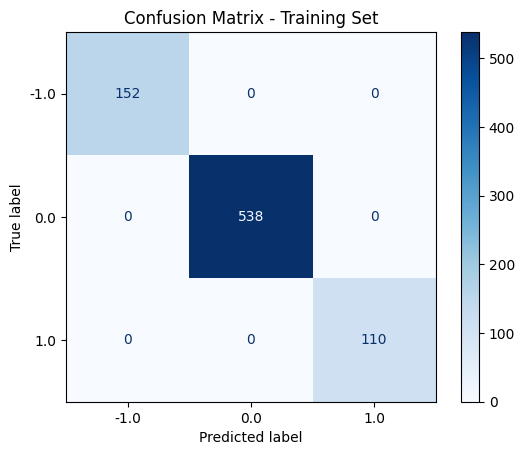


Test Set Metrics:
------------------

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.50      0.37      0.42        38
         0.0       0.75      0.86      0.80       134
         1.0       0.63      0.43      0.51        28

    accuracy                           0.70       200
   macro avg       0.63      0.55      0.58       200
weighted avg       0.69      0.70      0.69       200



<Figure size 800x600 with 0 Axes>

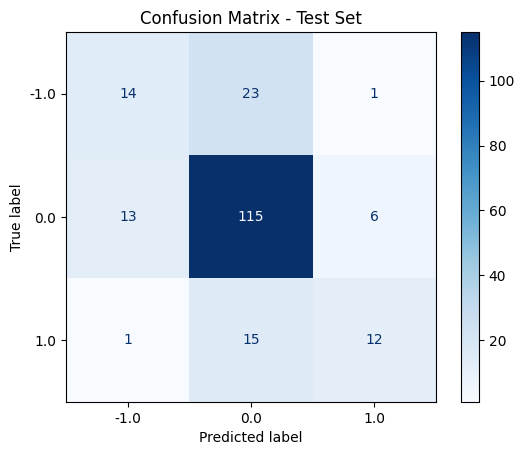


KNN Model Performance Metrics:
-------------------------------
Accuracy Score: 0.7050
Precision Score: 0.6870
Recall Score: 0.7050
F1 Score: 0.6890

Training and evaluating KNN Classifier with k=3...

KNN Classifier trained with k=3

Model Evaluation:
-----------------

Training Set Metrics:
---------------------

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.88      0.84      0.86       152
         0.0       0.89      0.97      0.93       538
         1.0       0.95      0.57      0.72       110

    accuracy                           0.89       800
   macro avg       0.91      0.80      0.84       800
weighted avg       0.90      0.89      0.89       800



<Figure size 800x600 with 0 Axes>

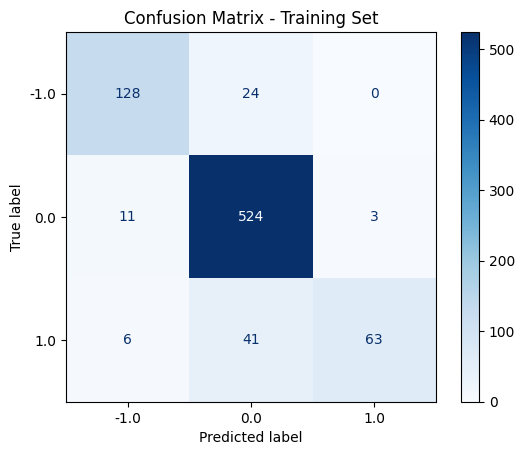


Test Set Metrics:
------------------

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.55      0.47      0.51        38
         0.0       0.78      0.89      0.83       134
         1.0       0.60      0.32      0.42        28

    accuracy                           0.73       200
   macro avg       0.64      0.56      0.59       200
weighted avg       0.71      0.73      0.71       200



<Figure size 800x600 with 0 Axes>

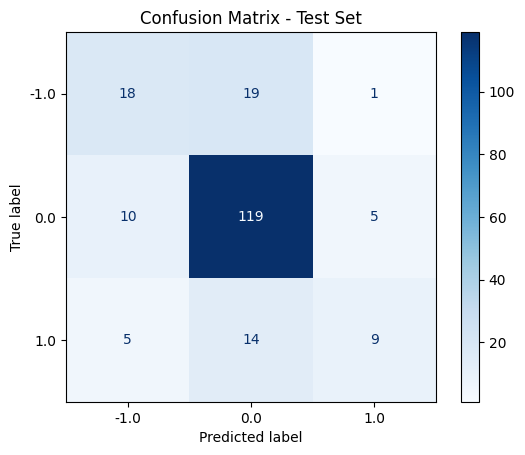


KNN Model Performance Metrics:
-------------------------------
Accuracy Score: 0.7300
Precision Score: 0.7122
Recall Score: 0.7300
F1 Score: 0.7125

Training and evaluating KNN Classifier with k=5...

KNN Classifier trained with k=5

Model Evaluation:
-----------------

Training Set Metrics:
---------------------

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.82      0.77      0.79       152
         0.0       0.84      0.96      0.90       538
         1.0       0.95      0.34      0.50       110

    accuracy                           0.84       800
   macro avg       0.87      0.69      0.73       800
weighted avg       0.85      0.84      0.82       800



<Figure size 800x600 with 0 Axes>

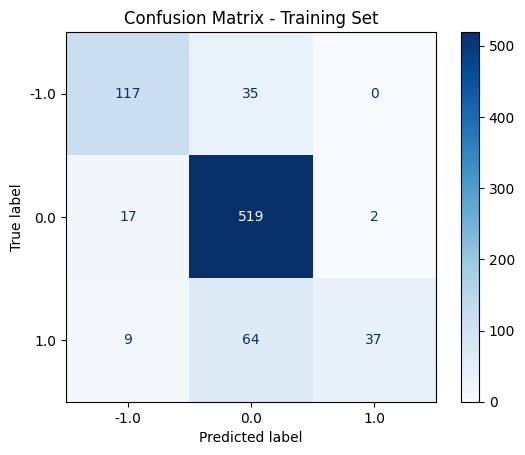


Test Set Metrics:
------------------

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.61      0.50      0.55        38
         0.0       0.78      0.93      0.85       134
         1.0       0.82      0.32      0.46        28

    accuracy                           0.76       200
   macro avg       0.74      0.58      0.62       200
weighted avg       0.76      0.76      0.74       200



<Figure size 800x600 with 0 Axes>

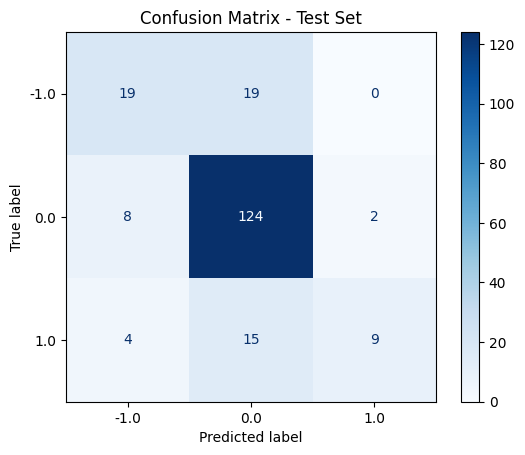


KNN Model Performance Metrics:
-------------------------------
Accuracy Score: 0.7600
Precision Score: 0.7568
Recall Score: 0.7600
F1 Score: 0.7383

Model Accuracies for Different k-values:

k=1:
Accuracy Score: 0.7050
Precision Score: 0.6870
Recall Score: 0.7050
F1 Score: 0.6890

k=3:
Accuracy Score: 0.7300
Precision Score: 0.7122
Recall Score: 0.7300
F1 Score: 0.7125

k=5:
Accuracy Score: 0.7600
Precision Score: 0.7568
Recall Score: 0.7600
F1 Score: 0.7383


In [ ]:
def evaluate_knn_model_accuracies(model, X_test, y_test):
    y_pred = model.predict(X_test)


    knn_scores = {
        'Accuracy Score': accuracy_score(y_test, y_pred),
        'Precision Score': precision_score(y_test, y_pred, average='weighted'),
        'Recall Score': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

    print("\nKNN Model Performance Metrics:")
    print("-------------------------------")
    for metric, value in knn_scores.items():
        print(f'{metric}: {value:.4f}')

    return knn_scores


Model_Accuracies = {
    'k=1': {'Accuracy Score': [], 'Precision Score': [], 'Recall Score': [], 'F1 Score': []},
    'k=3': {'Accuracy Score': [], 'Precision Score': [], 'Recall Score': [], 'F1 Score': []},
    'k=5': {'Accuracy Score': [], 'Precision Score': [], 'Recall Score': [], 'F1 Score': []}
}


for k in [1, 3, 5]:
    print(f"\nTraining and evaluating KNN Classifier with k={k}...")

    knn_model = train_knn_classifier(X_train_scaled, y_train, k=k)

    y_pred_knn = evaluate_knn_classifier(
        knn_model,
        X_test_scaled,
        y_test,
        X_train_scaled,
        y_train
    )

    knn_accuracies = evaluate_knn_model_accuracies(knn_model, X_test_scaled, y_test)

    for metric, value in knn_accuracies.items():
        Model_Accuracies[f'k={k}'][metric].append(value)

print("\nModel Accuracies for Different k-values:")
for k, scores in Model_Accuracies.items():
    print(f"\n{k}:")
    for metric, values in scores.items():
        print(f"{metric}: {values[0]:.4f}")


### 2. Naive Bayes

A Gaussian Naive Bayes classifier is implemented and evaluated using cross-validation. The model's accuracy and other metrics are analyzed to understand its performance.

In [ ]:
def train_naive_bayes(X_train, y_train):
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)

    print("\nNaive Bayes Model Trained Successfully!")
    return nb_model


In [ ]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model and print key metrics.
    """
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("\nModel Evaluation Metrics:")
    print("-------------------------")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return accuracy, precision, recall, f1

X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_data_for_modeling(df)

print("\nDataset shapes after preparation:")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("Training Naive Bayes Classifier...")
nb_model = train_naive_bayes(X_train_scaled, y_train)

print("\nEvaluating Naive Bayes Classifier...")
accuracy, precision, recall, f1 = evaluate_model(nb_model, X_test_scaled, y_test)


Final shapes:
X_train_scaled shape: (800, 12)
X_test_scaled shape: (200, 12)
y_train shape: (800,)
y_test shape: (200,)

Dataset shapes after preparation:
X_train shape: (800, 12)
X_test shape: (200, 12)
y_train shape: (800,)
y_test shape: (200,)
Training Naive Bayes Classifier...

Naive Bayes Model Trained Successfully!

Evaluating Naive Bayes Classifier...

Model Evaluation Metrics:
-------------------------
Accuracy: 0.8550
Precision: 0.8727
Recall: 0.8550
F1 Score: 0.8331

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.90      0.74      0.81        38
         0.0       0.84      1.00      0.91       134
         1.0       1.00      0.32      0.49        28

    accuracy                           0.85       200
   macro avg       0.91      0.69      0.74       200
weighted avg       0.87      0.85      0.83       200



In [ ]:
def cross_validate_naive_bayes(X_train, y_train, cv=5):
    nb_model = GaussianNB()

    scores = cross_val_score(nb_model, X_train, y_train, cv=cv, scoring='accuracy')

    print(f"\nCross-Validation Results ({cv}-fold):")
    print(f"Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.4f}")

    return scores.mean()

print("Performing Cross-Validation for Naive Bayes...")
mean_accuracy = cross_validate_naive_bayes(X_train_scaled, y_train)


Performing Cross-Validation for Naive Bayes...

Cross-Validation Results (5-fold):
Accuracy Scores: [0.84375 0.83125 0.81875 0.80625 0.85625]
Mean Accuracy: 0.8313


### 3. Ordinal Logistic Regression

Trains a logistic regression model with balanced class weights. The model handles multiclass classification using the 'multinomial' solver (default).

In [ ]:
class OrdinalRegression(BaseEstimator, ClassifierMixin):
    """
    Preserves ordering: Low < Moderate < High
    """
    def __init__(self, random_state=42):  # Need random_state parameter here
        self.random_state = random_state
        self._estimator_type = "classifier"

    def fit(self, X, y):
        self.classifiers = []
        self.classes_ = np.sort(np.unique(y))
        n_classes = len(self.classes_)  # Use self.classes_ for consistency

        for i in range(n_classes - 1):
            binary_y = (y > self.classes_[i]).astype(int)
            clf = LogisticRegression(random_state=self.random_state, max_iter=1000)  # Use self.random_state
            clf.fit(X, binary_y)
            self.classifiers.append(clf)
        return self

    def predict_proba(self, X):
        n_classes = len(self.classes_)  # Use self.classes_ instead
        n_samples = X.shape[0]
        probs = np.zeros((n_samples, n_classes))

        probs[:, 0] = 1 - self.classifiers[0].predict_proba(X)[:, 1]
        for i in range(1, n_classes - 1):
            probs[:, i] = (self.classifiers[i-1].predict_proba(X)[:, 1] -
                          self.classifiers[i].predict_proba(X)[:, 1])
        probs[:, -1] = self.classifiers[-1].predict_proba(X)[:, 1]

        # Add probability normalization
        probs = np.maximum(probs, 0)
        probs = probs / probs.sum(axis=1)[:, np.newaxis]
        return probs

    def predict(self, X):
        probs = self.predict_proba(X)
        return self.classes_[np.argmax(probs, axis=1)]

In [ ]:
def train_ordinal_regression(X_train, y_train):
    ordinal_model = OrdinalRegression()
    ordinal_model.fit(X_train, y_train)

    print("\nOrdinal Regression Model trained successfully!")
    return ordinal_model

In [ ]:
print("Training Ordinal Regression Model...")
logistic_ordinal_model = train_ordinal_regression(X_train_scaled, y_train)


Training Ordinal Regression Model...

Ordinal Regression Model trained successfully!


In [ ]:
def analyze_feature_importance(model, feature_names):
    importances = []
    for clf in model.classifiers:
        importances.append(clf.coef_[0])

    mean_importance = np.mean(importances, axis=0)

    feature_importance = pd.DataFrame(
        {'Feature': feature_names,
         'Importance': np.abs(mean_importance)
        }
    ).sort_values('Importance', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance in Ordinal Regression Model')
    plt.tight_layout()
    plt.show()

    return feature_importance


Analyzing feature importance...


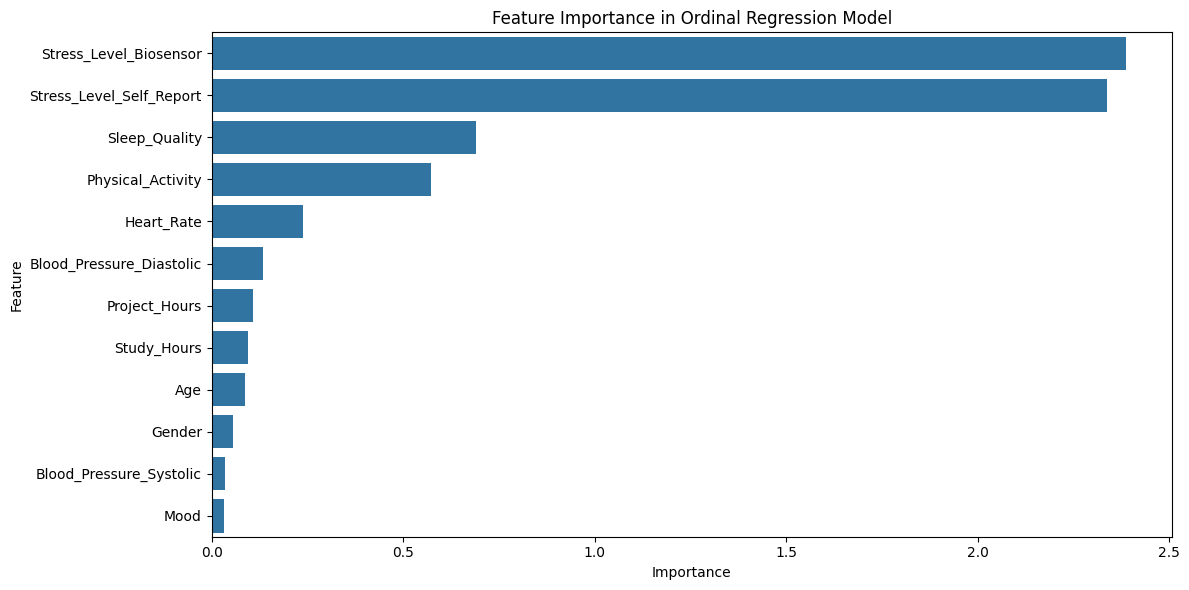


Top 5 Most Important Features:
                    Feature  Importance
5    Stress_Level_Biosensor    2.388136
6  Stress_Level_Self_Report    2.338307
8             Sleep_Quality    0.689323
7         Physical_Activity    0.572065
2                Heart_Rate    0.237936


In [ ]:
print("\nAnalyzing feature importance...")
feature_importance = analyze_feature_importance(logistic_ordinal_model, X_train_scaled.columns)
print("\nTop 5 Most Important Features:")
print(feature_importance.head())

### 4. Ordinal Support Vector Machine

Ordinal Support Vector Machines (SVM) are designed for ordered class labels (e.g., Low, Moderate, High). The SVM model is trained to predict probabilities for each threshold in the ordered classes by treating the classification as a series of binary problems, maintaining the ordinal nature of the labels.

In [ ]:
class OrdinalSVM(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1.0, kernel='rbf', gamma='scale', class_weight='balanced'):
        self.C = C
        self.kernel = kernel
        self.gamma = gamma
        self.class_weight = class_weight
        self.classifiers = []

    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        n_classes = len(self.classes_)

        for i in range(n_classes - 1):
            binary_y = (y > self.classes_[i]).astype(int)

            clf = SVC(
                C=self.C,
                kernel=self.kernel,
                gamma=self.gamma,
                class_weight=self.class_weight,
                probability=True,
                random_state=42
            )
            clf.fit(X, binary_y)
            self.classifiers.append(clf)

        return self

    def predict_proba(self, X):
        n_classes = len(self.classes_)
        n_samples = X.shape[0]

        probs = np.zeros((n_samples, n_classes))

        probs[:, 0] = 1 - self.classifiers[0].predict_proba(X)[:, 1]

        for i in range(1, n_classes - 1):
            probs[:, i] = (self.classifiers[i-1].predict_proba(X)[:, 1] -
                          self.classifiers[i].predict_proba(X)[:, 1])

        probs[:, -1] = self.classifiers[-1].predict_proba(X)[:, 1]

        probs = np.maximum(probs, 0)
        probs = probs / probs.sum(axis=1)[:, np.newaxis]

        return probs

    def predict(self, X):
        probs = self.predict_proba(X)
        return self.classes_[np.argmax(probs, axis=1)]

In [ ]:
def train_ordinal_svm(X_train, y_train):
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    base_model = OrdinalSVM(class_weight='balanced')

    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        cv=5,
        scoring='balanced_accuracy',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_


In [ ]:
ordinal_svm = train_ordinal_svm(X_train_scaled, y_train)

### 5. Random Forest Classifier

This algorithm is used for classification with hyperparameter tuning. A penalty is added to reduce overfitting.

In [ ]:
def train_random_forest_with_penalty(X_train, y_train, param_grid=None, cv=5, scoring='accuracy', random_state=42):
    """
    Train and cross-validate a Random Forest model with hyperparameter tuning.
    """
    if param_grid is None:
        # Default grid for tuning
       param_grid = {
            'n_estimators': [50, 100],
            'max_depth': [5, 10, 20],
            'min_samples_split': [10, 20],
            'min_samples_leaf': [5, 10],
        }


    rf_model = RandomForestClassifier(random_state=random_state)
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("\nBest Hyperparameters:")
    print(grid_search.best_params_)

    print("\nBest Cross-Validation Score:")
    print(f"{grid_search.best_score_:.4f}")

    best_model = grid_search.best_estimator_

    return best_model, grid_search.best_params_, grid_search.best_score_


In [ ]:
def evaluate_model_with_training_vs_test(model, X_train, y_train, X_test, y_test):
    """
    Evaluate the model and print training vs test accuracy.
    """
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test Metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Print Metrics
    print("\nTraining vs Test Metrics:")
    print("-------------------------")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")

    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_test_pred))

    return train_accuracy, test_accuracy, test_precision, test_recall, test_f1

# Assuming the dataset preparation function `prepare_data_for_modeling` is already defined
X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_data_for_modeling(df)

print("\nDataset shapes after preparation:")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Train Random Forest with hyperparameter tuning
print("Training Random Forest Classifier with Penalty (Hyperparameter Tuning)...")
rf_model, best_params, best_cv_score = train_random_forest_with_penalty(X_train_scaled, y_train)

print("\nEvaluating the Best Random Forest Classifier (Training vs Test)...")
train_accuracy, test_accuracy, test_precision, test_recall, test_f1 = evaluate_model_with_training_vs_test(
    rf_model, X_train_scaled, y_train, X_test_scaled, y_test
)


Final shapes:
X_train_scaled shape: (800, 12)
X_test_scaled shape: (200, 12)
y_train shape: (800,)
y_test shape: (200,)

Dataset shapes after preparation:
X_train shape: (800, 12)
X_test shape: (200, 12)
y_train shape: (800,)
y_test shape: (200,)
Training Random Forest Classifier with Penalty (Hyperparameter Tuning)...

Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 50}

Best Cross-Validation Score:
0.9513

Evaluating the Best Random Forest Classifier (Training vs Test)...

Training vs Test Metrics:
-------------------------
Training Accuracy: 0.9900
Test Accuracy: 0.9750
Test Precision: 0.9757
Test Recall: 0.9750
Test F1 Score: 0.9740

Classification Report (Test):
              precision    recall  f1-score   support

        -1.0       0.97      1.00      0.99        38
         0.0       0.97      1.00      0.99       134
         1.0       1.00      0.82      0.90        28

    accuracy                           0.97      

### 6. Decision Tree Classifier

A Decision Tree classifier is trained with various parameters. The section compares the model's training and testing accuracy to assess its performance.

In [ ]:
def train_decision_tree_with_penalty(X_train, y_train, param_grid=None, cv=5, scoring='accuracy', random_state=42):
    if param_grid is None:
        param_grid = {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': [None, 'sqrt', 'log2'],
        }

    dt_model = DecisionTreeClassifier(random_state=random_state)
    grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("\nBest Cross-Validation Score:")
    print(f"{grid_search.best_score_:.4f}")

    best_model = grid_search.best_estimator_

    return best_model, grid_search.best_params_, grid_search.best_score_

In [ ]:
def evaluate_model_with_training_vs_test(model, X_train, y_train, X_test, y_test):

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print("\nTraining vs Test Metrics:")
    print("-------------------------")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")

    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_test_pred))

    return train_accuracy, test_accuracy, test_precision, test_recall, test_f1

X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_data_for_modeling(df)

# Train Decision Tree with hyperparameter tuning
print("Training Decision Tree Classifier with Penalty (Hyperparameter Tuning)...")
dt_model, best_params, best_cv_score = train_decision_tree_with_penalty(X_train_scaled, y_train)

print("\nEvaluating the Best Decision Tree Classifier (Training vs Test)...")
train_accuracy, test_accuracy, test_precision, test_recall, test_f1 = evaluate_model_with_training_vs_test(
    dt_model, X_train_scaled, y_train, X_test_scaled, y_test
)


Final shapes:
X_train_scaled shape: (800, 12)
X_test_scaled shape: (200, 12)
y_train shape: (800,)
y_test shape: (200,)
Training Decision Tree Classifier with Penalty (Hyperparameter Tuning)...

Best Cross-Validation Score:
0.9912

Evaluating the Best Decision Tree Classifier (Training vs Test)...

Training vs Test Metrics:
-------------------------
Training Accuracy: 0.9912
Test Accuracy: 0.9900
Test Precision: 0.9901
Test Recall: 0.9900
Test F1 Score: 0.9899

Classification Report (Test):
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        38
         0.0       0.99      1.00      0.99       134
         1.0       1.00      0.93      0.96        28

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       0.99      0.99      0.99       200



### 7. Voting Classifier

In [ ]:
def create_voting_classifier(models, X_train, y_train):
    estimators = [(name, model) for name, model in models.items()]

    # Create and train voting classifier with soft voting
    voting_clf = VotingClassifier(
        estimators=estimators,
        voting='soft',
        n_jobs=-1
    )

    # Fit the voting classifier
    voting_clf.fit(X_train, y_train)

    return voting_clf

In [ ]:
def evaluate_voting_classifier(voting_clf, X_train, X_test, y_train, y_test, individual_models):
    """
    Evaluates the voting classifier and compares it with individual models

    """
    print("\nVoting Classifier Evaluation:")
    print("----------------------------")

    cv_scores = cross_val_score(
        voting_clf, X_train, y_train,
        cv=5,
        scoring='balanced_accuracy'
    )
    print("\nCross-validation scores:")
    print(f"Mean: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

    y_pred = voting_clf.predict(X_test)

    print("\nTest Set Classification Report:")
    print(classification_report(y_test, y_pred,
                              target_names=['Low Risk', 'Moderate Risk', 'High Risk']))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        display_labels=['Low', 'Moderate', 'High'],
        cmap='Blues'
    )
    plt.title('Voting Classifier Confusion Matrix - Test Set')
    plt.show()

    plt.figure(figsize=(10, 8))

    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    # Plot ROC curve for each model
    colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])

    # Add voting classifier
    y_score = voting_clf.predict_proba(X_test)
    for i, color in zip(range(n_classes), colors):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=color, lw=2,
                label=f'Voting (class {i}) (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves - Model Comparison')
    plt.legend(loc="lower right")
    plt.show()

    accuracies = {}
    for name, model in individual_models.items():
        accuracies[name] = model.score(X_test, y_test)
    accuracies['Voting Classifier'] = voting_clf.score(X_test, y_test)

    plt.figure(figsize=(10, 6))
    plt.bar(accuracies.keys(), accuracies.values())
    plt.title('Model Accuracy Comparison')
    plt.xticks(rotation=45)
    plt.ylabel('Accuracy Score')
    plt.tight_layout()
    plt.show()

    return y_pred

In [ ]:
models = {
    'Ordinal Logistic Regression': logistic_ordinal_model,
    'Ordinal SVM': ordinal_svm,
    'KNN': knn_model,
    'Naive Bayes': nb_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

voting_clf = create_voting_classifier(models, X_train_scaled, y_train)

voting_predictions = evaluate_voting_classifier(
    voting_clf,
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    models
)

print("\nFinal Model Comparison Summary:")
print("-------------------------------")
for name, model in models.items():
    print(f"\n{name} Test Accuracy: {model.score(X_test_scaled, y_test):.3f}")
print(f"\nVoting Classifier Test Accuracy: {voting_clf.score(X_test_scaled, y_test):.3f}")

ValueError: The estimator OrdinalRegression should be a classifier.

In [ ]:
from sklearn.base import is_classifier

name = ordinal_svm.__class__.__name__
if not is_classifier(ordinal_svm):
    print(f"Model '{name}' is not a valid classifier.")


Model 'OrdinalSVM' is not a valid classifier.


## Classification Model Evaluation

In [ ]:
def evaluate_models(models_dict, X_train, X_test, y_train, y_test):
    metrics = {
        'Model': [],
        'Train Accuracy': [],
        'Test Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': []
    }

    classes = np.unique(y_test)
    n_classes = len(classes)

    fig_roc, ax_roc = plt.subplots(1, len(models_dict), figsize=(20, 5))
    fig_cm, ax_cm = plt.subplots(1, len(models_dict), figsize=(20, 5))

    colors = cycle(['blue', 'red', 'green'])

    for idx, (model_name, model) in enumerate(models_dict.items()):
        print(f"\n{model_name} Evaluation:")
        print("-" * (len(model_name) + 11))

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        metrics['Model'].append(model_name)
        metrics['Train Accuracy'].append(accuracy_score(y_train, y_train_pred))
        metrics['Test Accuracy'].append(accuracy_score(y_test, y_test_pred))
        metrics['Precision'].append(precision_score(y_test, y_test_pred, average='weighted'))
        metrics['Recall'].append(recall_score(y_test, y_test_pred, average='weighted'))
        metrics['F1 Score'].append(f1_score(y_test, y_test_pred, average='weighted'))

        print("\nClassification Report:")
        print(classification_report(y_test, y_test_pred,
                                 target_names=['Low Risk', 'Moderate Risk', 'High Risk']))

        ConfusionMatrixDisplay.from_predictions(
            y_test,
            y_test_pred,
            display_labels=['Low', 'Moderate', 'High'],
            ax=ax_cm[idx],
            cmap='Blues'
        )
        ax_cm[idx].set_title(f'{model_name}\nConfusion Matrix')

        if hasattr(model, "predict_proba"):
            # Binarize the output
            y_test_bin = label_binarize(y_test, classes=classes)
            y_score = model.predict_proba(X_test)

            for i, (color, class_name) in enumerate(zip(colors, ['Low', 'Moderate', 'High'])):
                fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                roc_auc = auc(fpr, tpr)
                ax_roc[idx].plot(fpr, tpr, color=color, lw=2,
                               label=f'{class_name} (AUC = {roc_auc:.2f})')

            ax_roc[idx].plot([0, 1], [0, 1], 'k--', lw=2)
            ax_roc[idx].set_xlim([0.0, 1.0])
            ax_roc[idx].set_ylim([0.0, 1.05])
            ax_roc[idx].set_xlabel('False Positive Rate')
            ax_roc[idx].set_ylabel('True Positive Rate')
            ax_roc[idx].set_title(f'{model_name}\nROC Curves')
            ax_roc[idx].legend(loc="lower right")

    fig_roc.suptitle('ROC Curves for All Models', y=1.05)
    fig_cm.suptitle('Confusion Matrices for All Models', y=1.05)
    plt.tight_layout()

    metrics_df = pd.DataFrame(metrics)
    metrics_df.set_index('Model', inplace=True)

    plt.figure(figsize=(12, 6))
    metrics_df.plot(kind='bar', width=0.8)
    plt.title('Model Performance Comparison')
    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.xticks(rotation=60)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Print metrics summary
    print("\nMetrics Summary:")
    print("---------------")
    print(metrics_df.round(3))

    return metrics_df


Ordinal Regression Evaluation:
-----------------------------

Classification Report:
               precision    recall  f1-score   support

     Low Risk       0.88      0.74      0.80        38
Moderate Risk       0.86      0.90      0.88       134
    High Risk       0.63      0.61      0.62        28

     accuracy                           0.83       200
    macro avg       0.79      0.75      0.77       200
 weighted avg       0.83      0.83      0.83       200


Ordinal SVM Evaluation:
----------------------

Classification Report:
               precision    recall  f1-score   support

     Low Risk       0.89      0.84      0.86        38
Moderate Risk       0.91      0.94      0.93       134
    High Risk       0.85      0.79      0.81        28

     accuracy                           0.90       200
    macro avg       0.88      0.86      0.87       200
 weighted avg       0.90      0.90      0.90       200


KNN Evaluation:
--------------

Classification Report:
          

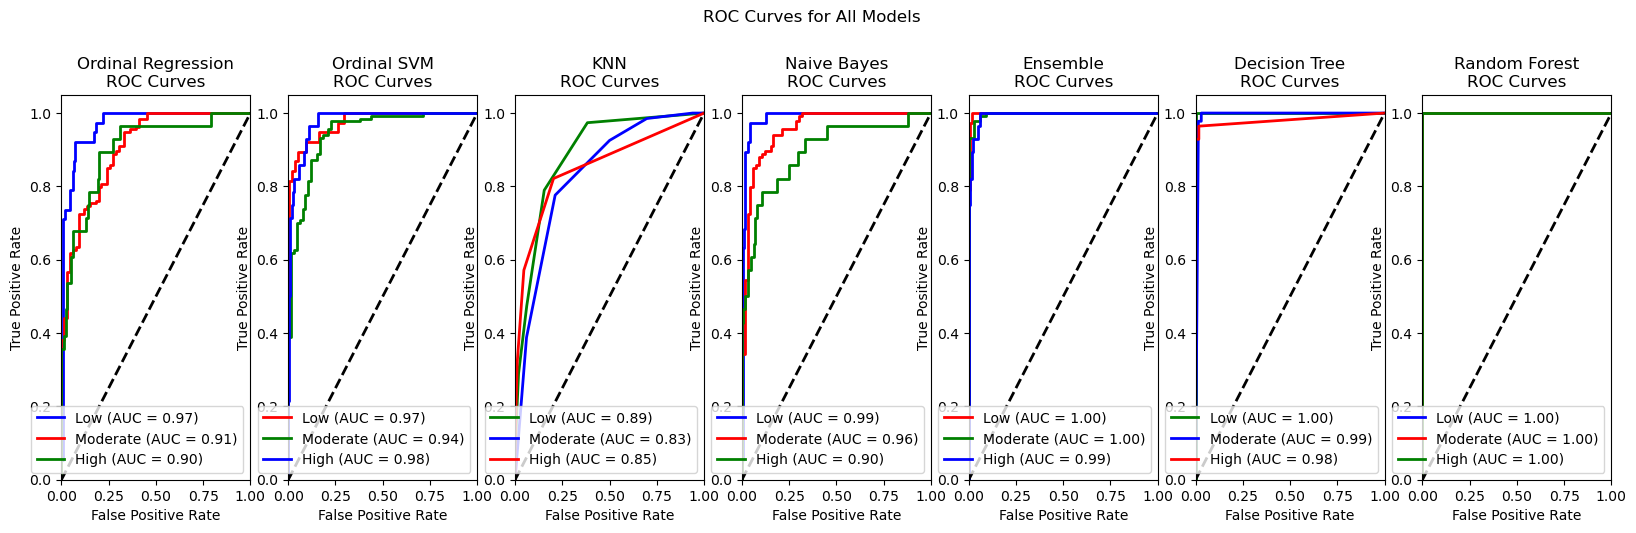

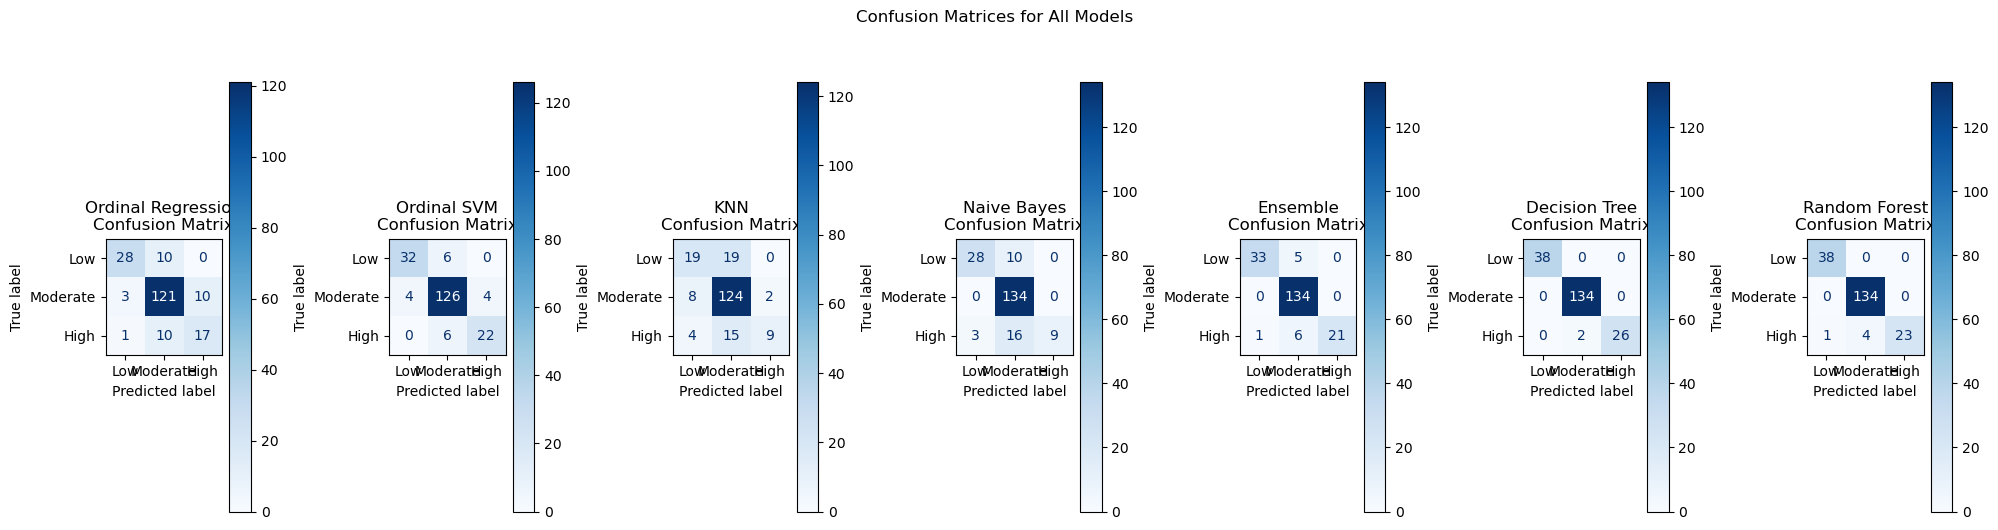

<Figure size 1200x600 with 0 Axes>

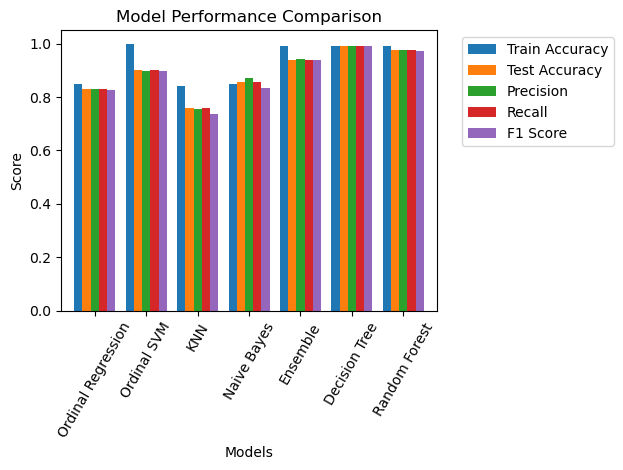


Metrics Summary:
---------------
                    Train Accuracy  Test Accuracy  Precision  Recall  F1 Score
Model                                                                         
Ordinal Regression           0.849          0.830      0.829   0.830     0.828
Ordinal SVM                  1.000          0.900      0.899   0.900     0.899
KNN                          0.841          0.760      0.757   0.760     0.738
Naive Bayes                  0.850          0.855      0.873   0.855     0.833
Ensemble                     0.991          0.940      0.944   0.940     0.938
Decision Tree                0.991          0.990      0.990   0.990     0.990
Random Forest                0.990          0.975      0.976   0.975     0.974


In [ ]:
models = {
    'Ordinal Regression': logistic_ordinal_model,
    'Ordinal SVM': ordinal_svm,
    'KNN': knn_model,
    'Naive Bayes': nb_model,
    'Ensemble': voting_clf,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

# Evaluate all models
metrics_df = evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)

## Unsupervised Learning

### Hierarchical Clustering

Using Complete Linkage to create maximum intercluster distance

In [ ]:
def plot_dendrogram_with_clusters(df):

    features = ['Heart_Rate', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
                'Stress_Level_Biosensor', 'Study_Hours']

    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    linkage_matrix = linkage(X_scaled, method='complete')

    plt.figure(figsize=(12, 8))
    plt.title('Hierarchical Clustering Dendrogram')

    dendrogram(linkage_matrix,
              truncate_mode=None,
              color_threshold=linkage_matrix[-2, 2],
              leaf_rotation=90)

    plt.axhline(y=linkage_matrix[-2, 2], color='r', linestyle='--',
                label='Cut for 3 clusters')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.legend()
    plt.tight_layout()
    plt.show()

    clusters = fcluster(linkage_matrix, 3, criterion='maxclust')

    cluster_sizes = pd.Series(clusters).value_counts().sort_index()
    print("\nCluster Sizes:")
    for cluster, size in cluster_sizes.items():
        print(f"Cluster {cluster}: {size} students")

    return clusters

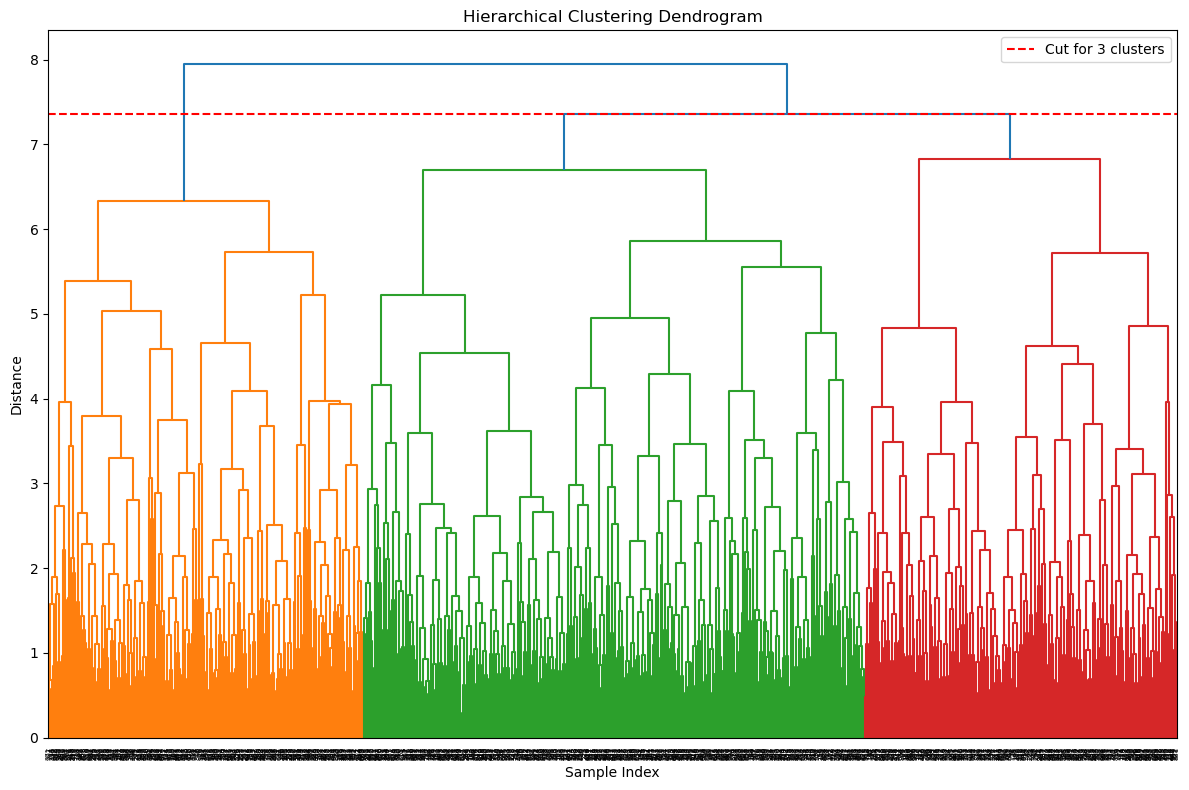


Cluster Sizes:
Cluster 1: 279 students
Cluster 2: 444 students
Cluster 3: 277 students


In [ ]:
clusters = plot_dendrogram_with_clusters(df)

### K-means Clustering

Using k = 3 to represent all the 3 types of health risk levels

Contingency Table:
col_0               -1    0    1
Health_Risk_Level               
-1                  62   62   66
0                  224  225  223
1                   35   53   50


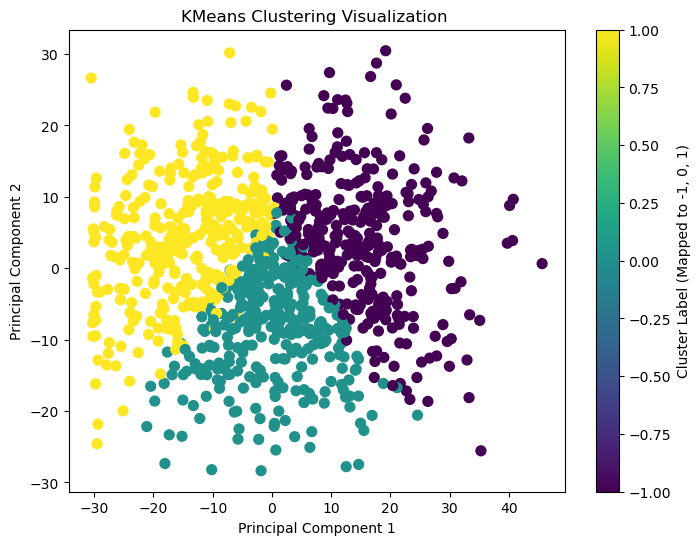

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=150, random_state=123)
kmeans.fit(df)

label_mapping = {0: -1, 1: 0, 2: 1}
clusterLabels = [label_mapping[label] for label in kmeans.labels_]


trueLabels = df['Health_Risk_Level']
contingency_table_k = pd.crosstab(trueLabels, clusterLabels)
print("Contingency Table:")
print(contingency_table_k)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df.iloc[:, :-1])

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusterLabels, cmap="viridis", s=50)
plt.colorbar(label="Cluster Label (Mapped to -1, 0, 1)")
plt.title("KMeans Clustering Visualization ")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Machine Learning Models for Regression
***Target Variable: Self-Reported Stress Level***

### Machine Learning Algorithms Used:
1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor
4. Support Vector Regressor
5. Decision Tree Regressor
6. Bagging Regressor (estimator = Random Forest Regressor)
7. Soft Voting Ensemble Regressor

### 1. Linear Regression Model

In [ ]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]
}

elastic_net = ElasticNet(random_state=42)
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_reg_train, Y_reg_train)

print("Best Parameters:", grid_search.best_params_)

LR = grid_search.best_estimator_
LR.fit(X_reg_train, Y_reg_train)

y_pred_best = LR.predict(X_reg_valid)
mse_best = MSE(Y_reg_valid, y_pred_best)
r2_best = R2(Y_reg_valid, y_pred_best)

print(f"Optimized Elastic Net MSE: {mse_best}")
print(f"Optimized Elastic Net R² Score: {r2_best}")

Best Parameters: {'alpha': 0.01, 'l1_ratio': 1}
Optimized Elastic Net MSE: 3.9679529141824528
Optimized Elastic Net R² Score: 0.3657834591621504


In [ ]:
LR_pred = LR.predict(X_reg_test)
LR_scores = {
    'Mean Squared Error (MSE)': MSE(Y_reg_test, LR_pred),
    'Mean Absolute Error (MAE)': MAE(Y_reg_test, LR_pred),
    'R2 Score': R2(Y_reg_test, LR_pred)
}
for metric, value in LR_scores.items():
    print(f'{metric}= {value}')

Mean Squared Error (MSE)= 4.7897761469879985
Mean Absolute Error (MAE)= 1.7566119341183626
R2 Score= 0.3236849034239274


### 2. Random Forest Regressor Model

**Hyperparameter Tuning For Random Forest Algorithm**

In [ ]:
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    scoring="neg_mean_squared_error",
    cv=3,
    n_jobs=-1
)
grid_search_rf.fit(X_reg_train, Y_reg_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
best_rf = grid_search.best_estimator_
best_rf.fit(X_reg_train, Y_reg_train)

y_pred_rf = best_rf.predict(X_reg_valid)
mse_best_rf = MSE(Y_reg_valid, y_pred_rf)
r2_best_rf = R2(Y_reg_valid, y_pred_rf)

print(f"Optimized Random Forest MSE: {mse_best_rf}")
print(f"Optimized Random Forest R² Score: {r2_best_rf}")

Best parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Random Forest MSE: 3.9679529141824528
Optimized Random Forest R² Score: 0.3657834591621504


In [ ]:
RFR = grid_search_rf.best_estimator_
RFR_pred = RFR.predict(X_reg_test)
RFR_scores = {
    'Mean Squared Error (MSE)': MSE(Y_reg_test, RFR_pred),
    'Mean Absolute Error (MAE)': MAE(Y_reg_test, RFR_pred),
    'R2 Score': R2(Y_reg_test, RFR_pred)
}

for metric, value in RFR_scores.items():
    print(f'{metric}= {value}')

Mean Squared Error (MSE)= 3.293602299203168
Mean Absolute Error (MAE)= 1.4996739846259948
R2 Score= 0.5349442460960281


### 3. Gradient Boosting Regressor

In [ ]:
GBR = GradientBoostingRegressor()
GBR.fit(X_reg_train, Y_reg_train)

GradientBoostingRegressor()

In [ ]:
GBR_pred = GBR.predict(X_reg_test)
GBR_scores = {
    'Mean Squared Error (MSE)': MSE(Y_reg_test, GBR_pred),
    'Mean Absolute Error (MAE)': MAE(Y_reg_test, GBR_pred),
    'R2 Score': R2(Y_reg_test, GBR_pred)
}

for metric, value in GBR_scores.items():
    print(f'{metric}= {value}')

Mean Squared Error (MSE)= 3.8796677995887463
Mean Absolute Error (MAE)= 1.5916401474315942
R2 Score= 0.4521919559410015


### 4. Support Vector Regressor

In [ ]:
SVMR = SVR(kernel = "rbf", C = 1.0, epsilon = 0.1)
SVMR.fit(X_reg_train, Y_reg_train)

SVR()

In [ ]:
SVMR_pred = SVMR.predict(X_reg_test)
SVMR_scores = {
    'Mean Squared Error (MSE)': MSE(Y_reg_test, SVMR_pred),
    'Mean Absolute Error (MAE)': MAE(Y_reg_test, SVMR_pred),
    'R2 Score': R2(Y_reg_test, SVMR_pred)
}

for metric, value in SVMR_scores.items():
    print(f"{metric} = {value}")

Mean Squared Error (MSE) = 4.999320570203174
Mean Absolute Error (MAE) = 1.7852085810796654
R2 Score = 0.29409728753651965


### 5. Decision Tree Regressor

In [ ]:
DTR = DecisionTreeRegressor(random_state=42, max_depth=5)
DTR.fit(X_reg_train, Y_reg_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
DTR_pred = DTR.predict(X_reg_test)

DTR_scores = {
    "Mean Squared Error (MSE)": MSE(Y_reg_test, DTR_pred),
    "Mean Absolute Error (MAE)": MAE(Y_reg_test, DTR_pred),
    "R2 Score": R2(Y_reg_test, DTR_pred)
}
print("Decision Tree Regressor Results:")
for metric, value in DTR_scores.items():
    print(f"{metric}: {value}")

Decision Tree Regressor Results:
Mean Squared Error (MSE): 4.00471352331424
Mean Absolute Error (MAE): 1.5778783875870652
R2 Score: 0.43453553356915153


### 6. Bagging Regressor

In [ ]:
BR = BaggingRegressor(estimator=RFR, n_estimators = 10, random_state = 42)
BR.fit(X_reg_train,Y_reg_train)

BaggingRegressor(estimator=RandomForestRegressor(max_depth=5, random_state=42),
                 random_state=42)

In [ ]:
BR_pred = BR.predict(X_reg_test)
BR_scores = {
    'Mean Squared Error (MSE)': MSE(Y_reg_test, BR_pred),
    'Mean Absolute Error (MAE)': MAE(Y_reg_test, BR_pred),
    'R2 Score': R2(Y_reg_test, BR_pred)
}

for metric, value in BR_scores.items():
    print(f"{metric} = {value}")

Mean Squared Error (MSE) = 3.237959101947726
Mean Absolute Error (MAE) = 1.4989016799174104
R2 Score = 0.5428010504999835


## Model Comparision

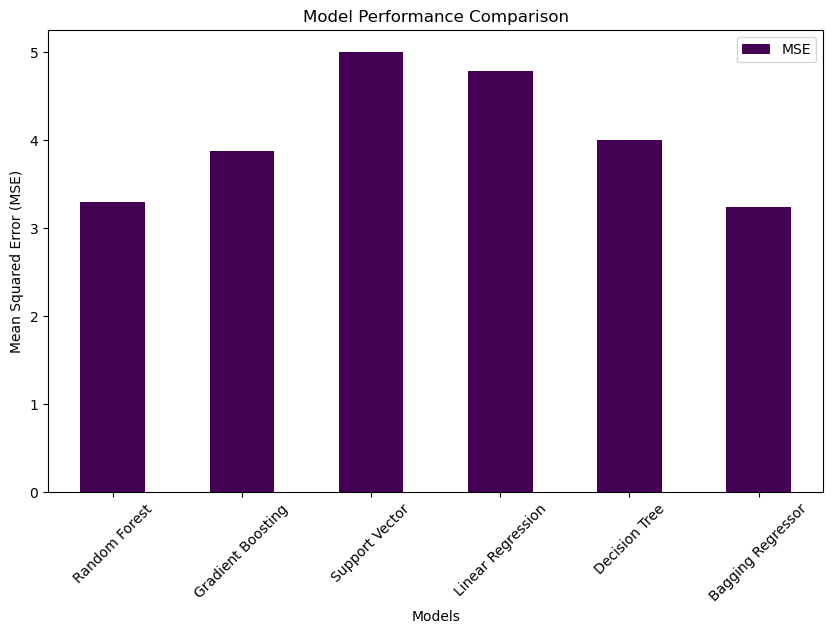

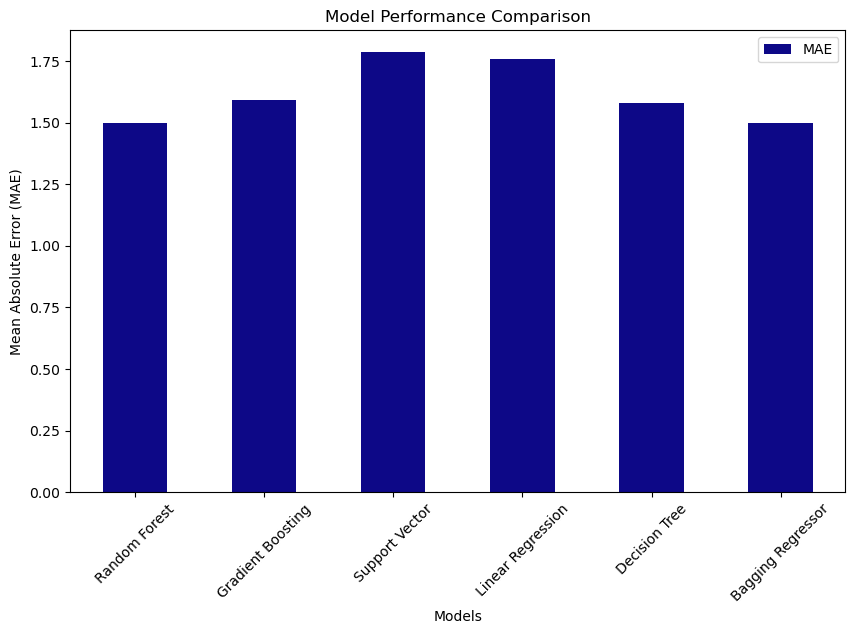

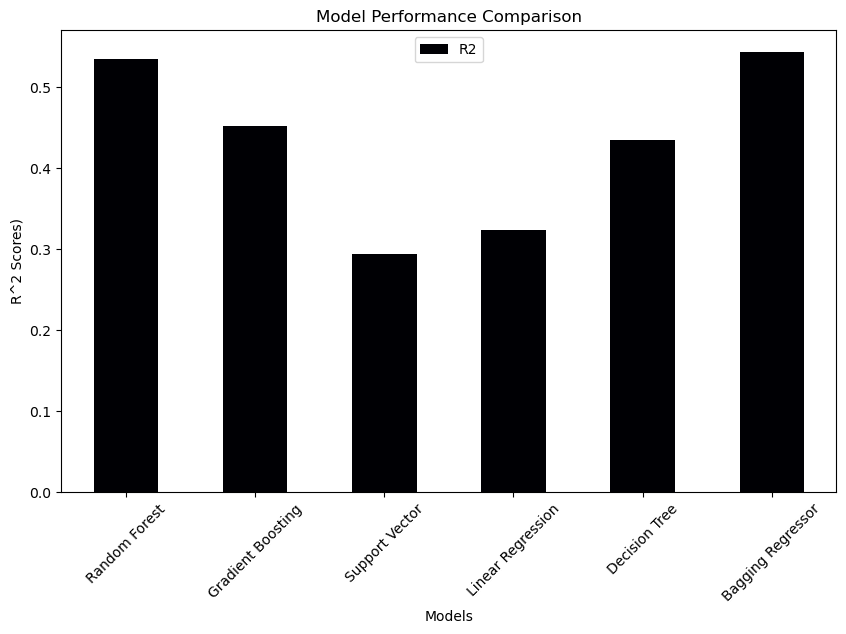

In [ ]:

results_mse = {
    "Model": [
        "Random Forest",
        "Gradient Boosting",
        "Support Vector",
        "Linear Regression",
        "Decision Tree",
        "Bagging Regressor",
    ],
    "MSE": [
        RFR_scores["Mean Squared Error (MSE)"],
        GBR_scores["Mean Squared Error (MSE)"],
        SVMR_scores["Mean Squared Error (MSE)"],
        LR_scores["Mean Squared Error (MSE)"],
        DTR_scores["Mean Squared Error (MSE)"],
        BR_scores["Mean Squared Error (MSE)"],
    ]
}

results_mae = {
    "Model": [
        "Random Forest",
        "Gradient Boosting",
        "Support Vector",
        "Linear Regression",
        "Decision Tree",
        "Bagging Regressor",
    ],
    "MAE": [
        RFR_scores["Mean Absolute Error (MAE)"],
        GBR_scores["Mean Absolute Error (MAE)"],
        SVMR_scores["Mean Absolute Error (MAE)"],
        LR_scores["Mean Absolute Error (MAE)"],
        DTR_scores["Mean Absolute Error (MAE)"],
        BR_scores["Mean Absolute Error (MAE)"],
    ]
}
results_r2 = {
    "Model": [
        "Random Forest",
        "Gradient Boosting",
        "Support Vector",
        "Linear Regression",
        "Decision Tree",
        "Bagging Regressor",
    ],
    "R2": [
        RFR_scores["R2 Score"],
        GBR_scores["R2 Score"],
        SVMR_scores["R2 Score"],
        LR_scores["R2 Score"],
        DTR_scores["R2 Score"],
        BR_scores["R2 Score"],
    ]
}

# Convert to DataFrame
results_mse_df = pd.DataFrame(results_mse)
results_mse_df.set_index("Model", inplace=True)

# Bar plot for comparison
results_mse_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.show()

results_mae_df = pd.DataFrame(results_mae)
results_mae_df.set_index("Model", inplace=True)

# Bar plot for comparison
results_mae_df.plot(kind="bar", figsize=(10, 6), colormap="plasma")
plt.title("Model Performance Comparison")
plt.ylabel("Mean Absolute Error (MAE)")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.show()

results_r2_df = pd.DataFrame(results_r2)
results_r2_df.set_index("Model", inplace=True)

# Bar plot for comparison
results_r2_df.plot(kind="bar", figsize=(10, 6), colormap="inferno")
plt.title("Model Performance Comparison")
plt.ylabel("R^2 Scores)")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.show()

## 6. Soft Voting Regressor

Since the best results are obtained from Random Forest, Gradient Booting and Baggin Regressor models. We can combine them into an ensemble model. The ensemble model we have selected for this project is the *Voting Ensemble Regressor Model*

In [ ]:
voting = VotingRegressor(estimators = [
    ("Random Forest", RFR),
    ("Gradient Boosting", GBR),
    ("Bagging Regressor", BR)
])
voting.fit(X_reg_train, Y_reg_train)

VotingRegressor(estimators=[('Random Forest',
                             RandomForestRegressor(max_depth=5,
                                                   random_state=42)),
                            ('Gradient Boosting', GradientBoostingRegressor()),
                            ('Bagging Regressor',
                             BaggingRegressor(estimator=RandomForestRegressor(max_depth=5,
                                                                              random_state=42),
                                              random_state=42))])

In [ ]:
voting_pred = voting.predict(X_reg_test)
voting_scores = {
    'Mean Squared Error (MSE)': MSE(Y_reg_test, voting_pred),
    'Mean Absolute Error (MAE)': MAE(Y_reg_test, voting_pred),
    'R2 Score': R2(Y_reg_test, voting_pred)
}

for metric, value in voting_scores.items():
    print(f"{metric} = {value}")

Mean Squared Error (MSE) = 3.394347968940269
Mean Absolute Error (MAE) = 1.524214887671257
R2 Score = 0.5207189847754724


### Residual Analysis

We will use the Soft Voting regressor to analyse the residual data, and obtain a graph for the prediction vs. actual plot, and an error distribution plot.

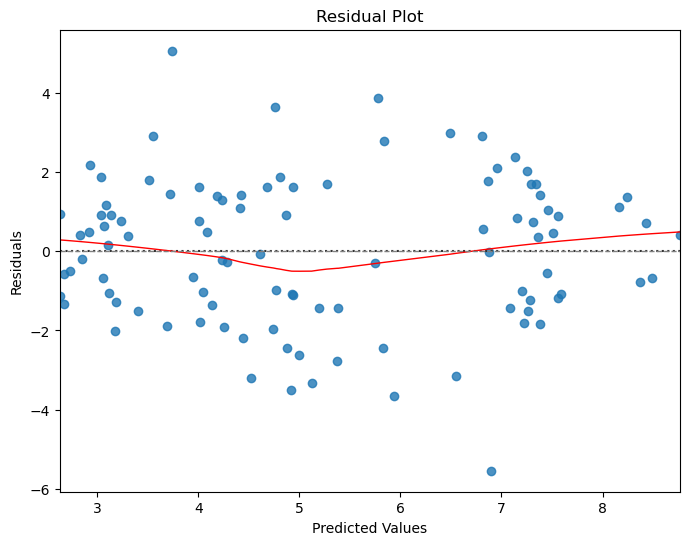

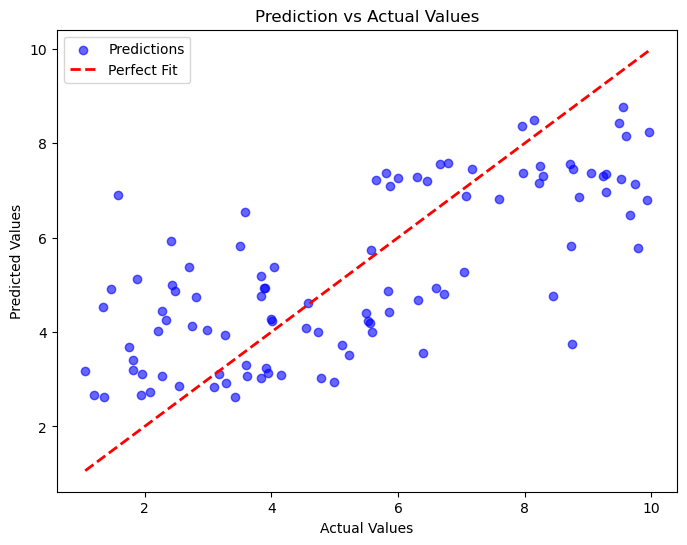

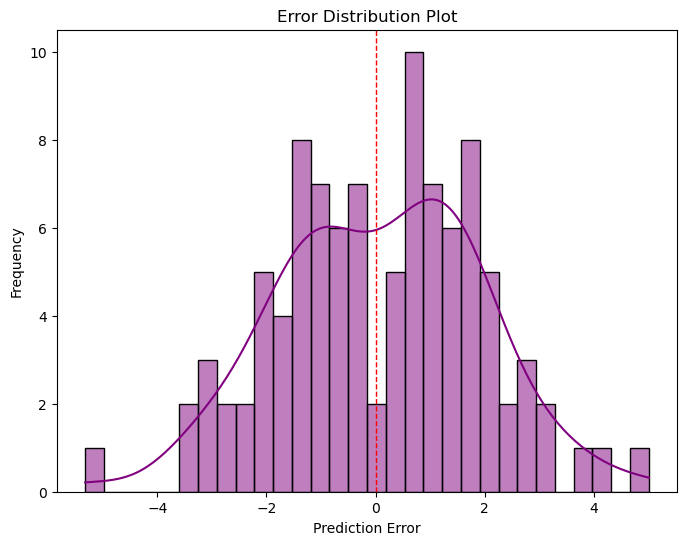

In [ ]:
voting_y_pred = voting.predict(X_reg_test)
residuals = Y_reg_test - voting_y_pred

# 1. Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=voting_y_pred, y=residuals, lowess=True, line_kws={"color": "red", "lw": 1})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="gray", linestyle="--", linewidth=1)
plt.show()

# 2. Prediction vs. Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_reg_test, voting_y_pred, color="blue", alpha=0.6, label="Predictions")
plt.plot([min(Y_reg_test), max(Y_reg_test)], [min(Y_reg_test), max(Y_reg_test)], color="red", linestyle="--", linewidth=2, label="Perfect Fit")
plt.title("Prediction vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

# 3. Error Distribution Plot
errors = Y_reg_test - voting_y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True, color="purple")
plt.title("Error Distribution Plot")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.axvline(x=0, color="red", linestyle="--", linewidth=1)
plt.show()


In [ ]:
import sys
import sklearn
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

from sklearn.utils.estimator_checks import check_estimator

try:
    check_estimator(OrdinalRegression())
    print("Estimator passes all checks")
except Exception as e:
    print(f"Estimator check failed: {str(e)}")


def test_classifier_compatibility(clf):
    print(f"Testing classifier compatibility...")
    print(f"Has _estimator_type:", hasattr(clf, '_estimator_type'))
    if hasattr(clf, '_estimator_type'):
        print(f"_estimator_type value:", clf._estimator_type)
    print(f"Has predict_proba:", hasattr(clf, 'predict_proba'))
    print(f"Has classes_:", hasattr(clf, 'classes_'))
    print(f"Has fit:", hasattr(clf, 'fit'))
    print(f"Is BaseEstimator:", isinstance(clf, BaseEstimator))
    print(f"Is ClassifierMixin:", isinstance(clf, ClassifierMixin))

# Test your classifier
ordinal_clf = OrdinalRegression()
test_classifier_compatibility(ordinal_clf)


Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Scikit-learn version: 1.6.0
NumPy version: 1.26.4
Pandas version: 2.2.2
Estimator check failed: Estimator OrdinalRegression should not set any attribute apart from parameters during init. Found attributes ['classes_', 'classifiers'].
Testing classifier compatibility...
Has _estimator_type: True
_estimator_type value: classifier
Has predict_proba: True
Has classes_: True
Has fit: True
Is BaseEstimator: True
Is ClassifierMixin: True
